# Important Library

In [1]:
## reading data
import pandas as pd

## linear operations on data
import numpy as np

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## ML Preprocessin Algorizm (to normalize data)
from sklearn.preprocessing import normalize , LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#Neural network module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

## stop future warnings
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

# Readig Data

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
## shape of the data
data.shape

(150, 5)

In [4]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,Iris-versicolor
41,4.5,2.3,1.3,0.3,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
33,5.5,4.2,1.4,0.2,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor


# EDA

In [5]:
## Info About The Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> Data `Doesn't` Have Any Null Values

In [6]:
## Description About The Data
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


>Fome The Data Desription:
>> Data Need to Be Normalized Based On The Large Distans Between the Data Points Like
<br>
>> 1.`Sepal Length` And `Petal Length`
</br>
>> 2.`Sepal Width` And `Petal Width`

In [7]:
## check for Duplicated Values
data.duplicated().sum()

3

In [8]:
## Drop Duplicated Values
data.drop_duplicates(inplace = True)

### PLOT `Sepal Length Vs Sepal Width`

Text(0.5, 1.0, 'Sepal Length Vs Sepal Width')

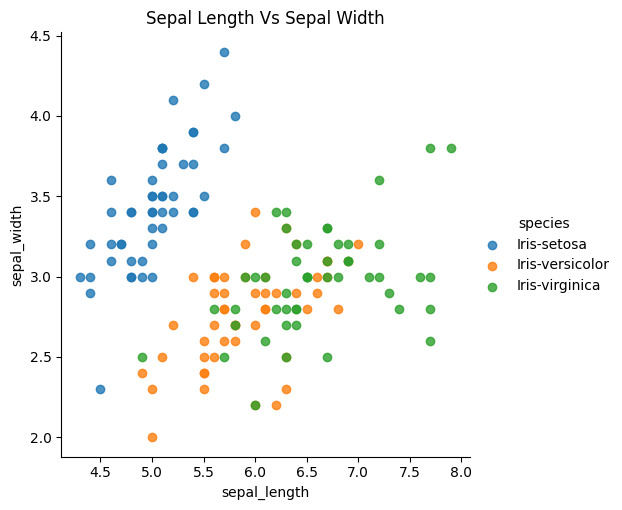

In [9]:
sns.lmplot(x ='sepal_length',y = 'sepal_width',
           data = data,
           fit_reg = False,
           hue = 'species')
plt.title('Sepal Length Vs Sepal Width')

### PLOT `Sepal Length Vs Sepal Width`

Text(0.5, 1.0, 'Petal Length Vs Petal Width')

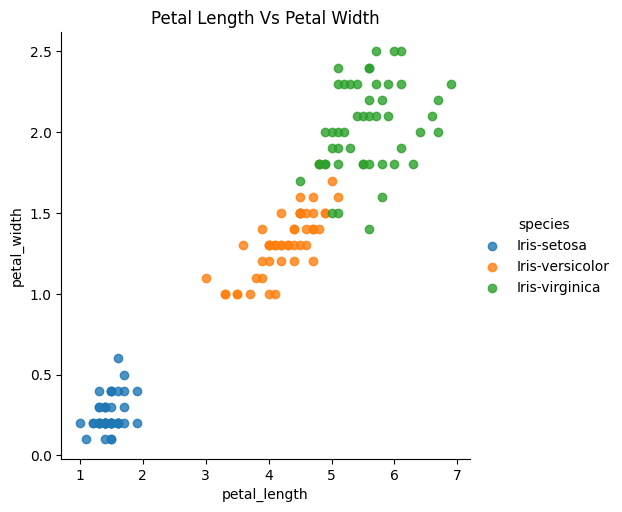

In [10]:
sns.lmplot(x = 'petal_length', y = 'petal_width',
           data = data,
           fit_reg = False,
           hue = 'species')
plt.title('Petal Length Vs Petal Width')

### PLOT `Sepal Length Vs Petal Length`

Text(0.5, 1.0, 'Sepal Length Vs Petal Length')

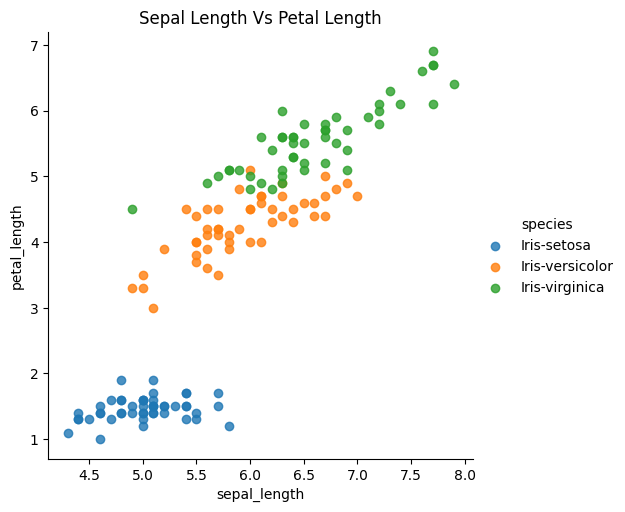

In [11]:
sns.lmplot(x = 'sepal_length', y = 'petal_length',
           data = data,
           fit_reg = False,
           hue = 'species')
plt.title('Sepal Length Vs Petal Length')

### PLOT `Sepal Width Vs Petal Width`

Text(0.5, 1.0, 'Sepal Width Vs Petal Width')

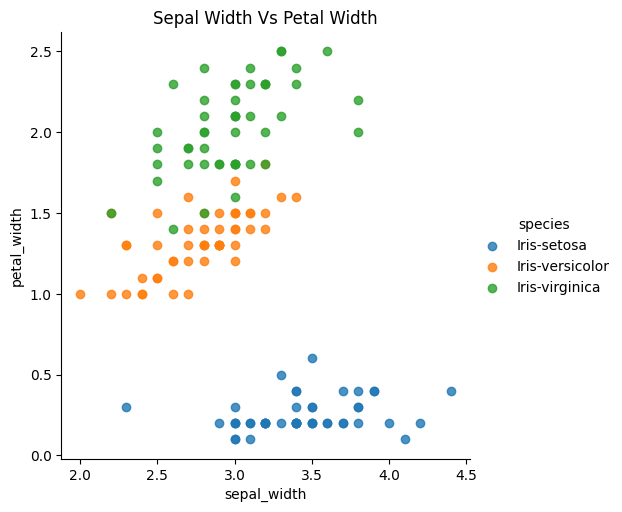

In [12]:
sns.lmplot(x = 'sepal_width', y = 'petal_width',
           data = data,
           fit_reg = False,
           hue = 'species')
plt.title('Sepal Width Vs Petal Width')

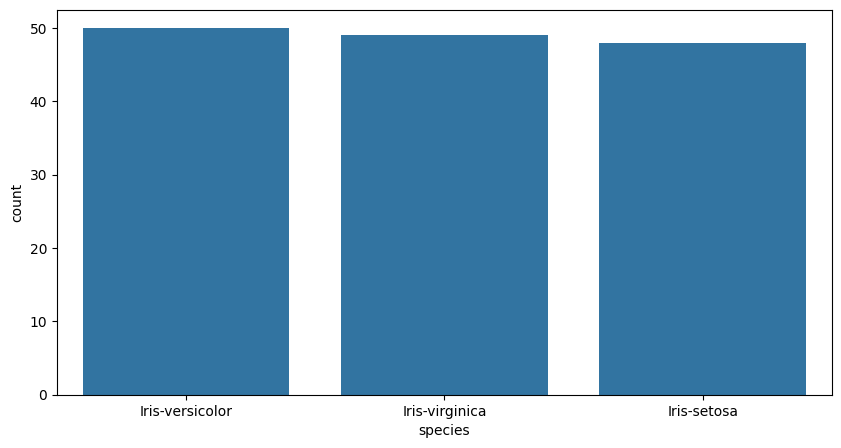

In [13]:
plt.figure(figsize=(10,5))
x = sns.countplot(data=data, x = 'species', order = data['species'].value_counts().index)

In [14]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Get The Unique Target Values

In [15]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
## Encoding Categorical data to numerical
data.loc[data['species'] == 'Iris-setosa' , 'species'] = 0
data.loc[data['species'] == 'Iris-versicolor' , 'species'] = 1
data.loc[data['species'] == 'Iris-virginica' , 'species'] = 2

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# shuffle the DataFrame rows
data = data.sample(frac = 1)

In [19]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
111,6.4,2.7,5.3,1.9,2
71,6.1,2.8,4.0,1.3,1
5,5.4,3.9,1.7,0.4,0
140,6.7,3.1,5.6,2.4,2
83,6.0,2.7,5.1,1.6,1


reprocessin

## Split Data

In [20]:
X = data.drop(columns = ['species'] ) ## Features
y = data['species'] ## Target
print("Shape of X",X.shape)
print("Shape of y",y.shape)

Shape of X (147, 4)
Shape of y (147,)


In [21]:
## Normalizing data to make all values in the same scale from 0 to 1
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.08924953 0.07214662 0.10490443 0.10994052]
 [0.08506595 0.07481872 0.07917316 0.07522246]
 [0.07530429 0.10421179 0.03364859 0.02314537]]


In [22]:
# Convert labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
# Convert numerical labels to one-hot encoded vectors
y = to_categorical(y)

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Modle

In [25]:
# Build the neural network model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [36]:
from keras.layers import Dropout

In [37]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              5000      
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dense_7 (Dense)             (None, 300)               150300    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656703 (2.51 MB)
Trainable params: 656703 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)


Epoch 1/10
6/6 [==============================] - 1s 62ms/step - loss: 0.9453 - accuracy: 0.5214 - val_loss: 0.7531 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 0.6435 - accuracy: 0.6410 - val_loss: 0.4835 - val_accuracy: 0.7000
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 0.4783 - accuracy: 0.6923 - val_loss: 0.4261 - val_accuracy: 0.7000
Epoch 4/10
6/6 [==============================] - 0s 28ms/step - loss: 0.3532 - accuracy: 0.8376 - val_loss: 0.3387 - val_accuracy: 0.8333
Epoch 5/10
6/6 [==============================] - 0s 20ms/step - loss: 0.3139 - accuracy: 0.8632 - val_loss: 0.2228 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 0s 21ms/step - loss: 0.2240 - accuracy: 0.9231 - val_loss: 0.2259 - val_accuracy: 0.9333
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2080 - accuracy: 0.9402 - val_loss: 0.1396 - val_accuracy: 0.9667
Epoch 8/10
6/6 [===========

In [41]:
# Evaluate the model on the test set
predictions = model.predict(X_test)
y_pred = [round(prediction[0]) for prediction in predictions]

1/1 [==============================] - 0s 94ms/step


In [42]:
# Convert one-hot encoded labels back to numerical labels for evaluation
y_test_labels = [list(label).index(1) for label in y_test]

In [43]:
# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 0.00%


In [44]:
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       8.0
           1       0.00      0.00      0.00      12.0
           2       0.00      0.00      0.00      10.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 93ms/step
Accuracy of the dataset 96.66666666666667
